# Exploratory Data Analysis of eCommerce Data

### Objective
This project explores customer transaction data from an online retail store. The goal is to characterize the data and generate useful insights for data-driven decision-making.

[Data Source](https://www.coursera.org/learn/perform-exploratory-data-analysis-on-retail-data-with-python/)

### Skills
Python, Exploratory Data Analysis, Pandas, Data Visualization, Statistics, Data Analytics.

## Step 0: Load the Data & Prepare Workspace

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import pandas as pd
from geopy.geocoders import Nominatim
import pycountry

In [2]:
df = pd.read_excel('Online Retail.xlsx')

## Step 1: Visually Explore Initial Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [7]:
df['Description'].value_counts().nlargest(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
PAPER CHAIN KIT 50'S CHRISTMAS        1210
JUMBO SHOPPER VINTAGE RED PAISLEY     1202
LUNCH BAG CARS BLUE                   1197
LUNCH BAG SPACEBOY DESIGN             1192
JAM MAKING SET PRINTED                1182
Name: count, dtype: int64

Text(0, 0.5, 'SKU Quant per Order')

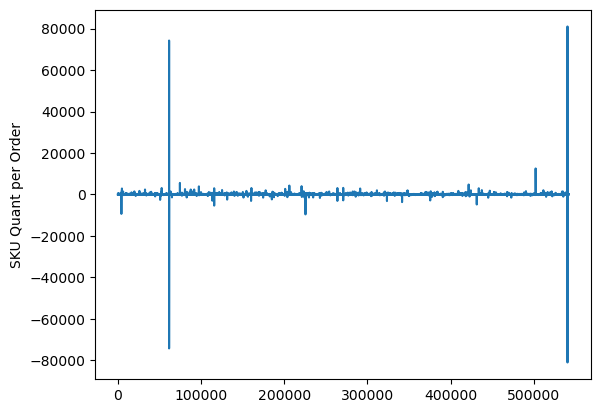

In [8]:
plt.plot(df['Quantity'])
plt.ylabel('SKU Quant per Order')

Text(0.5, 1.0, 'Monthly Sales')

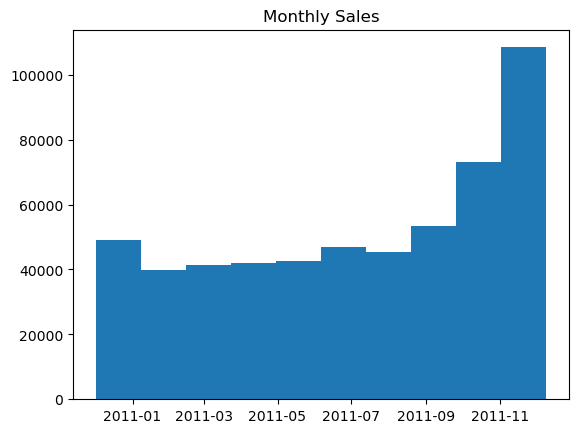

In [9]:
plt.hist(df['InvoiceDate'])
plt.title('Monthly Sales')

{'whiskers': [<matplotlib.lines.Line2D at 0x58d4be7d90>,
 'caps': [<matplotlib.lines.Line2D at 0x58ced51850>,
 'boxes': [<matplotlib.lines.Line2D at 0x58d0408290>],
 'medians': [<matplotlib.lines.Line2D at 0x58ce433a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x58ce432290>],
 'means': []}

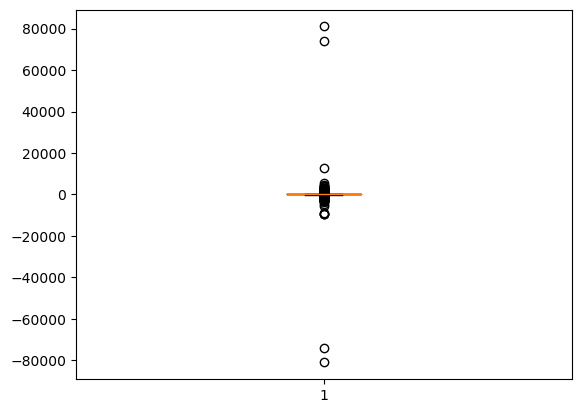

In [10]:
plt.boxplot(df['Quantity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x58d3908310>,
 'caps': [<matplotlib.lines.Line2D at 0x58d3908290>,
 'boxes': [<matplotlib.lines.Line2D at 0x58d6e34a90>],
 'medians': [<matplotlib.lines.Line2D at 0x58d3908650>],
 'fliers': [<matplotlib.lines.Line2D at 0x58ce455a90>],
 'means': []}

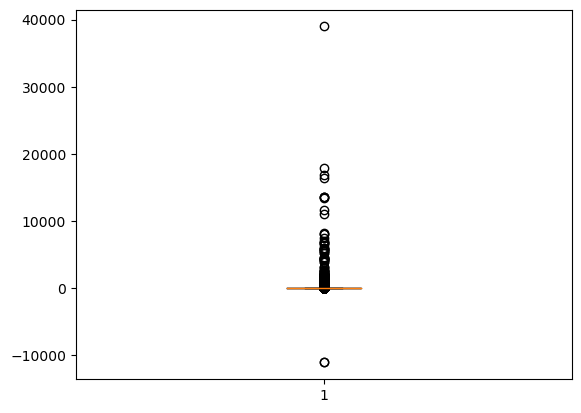

In [11]:
plt.boxplot(df['UnitPrice'])

## Step 2: Clean Data

#### 2.1 Assess the impact of nulls

In [12]:
null_rows = df[df.isna().any(axis=1)]

In [13]:
null_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [14]:
null_rows.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,135080.000000,135080,135080.000000,0.0
mean,1.995573,2011-06-16 03:03:12.611637760,8.076577,NaN
min,-9600.000000,2010-12-01 11:52:00,-11062.060000,NaN
25%,1.000000,2011-02-21 18:10:00,1.630000,NaN
50%,1.000000,2011-06-27 15:27:00,3.290000,NaN
75%,3.000000,2011-10-11 16:37:00,5.450000,NaN
max,5568.000000,2011-12-09 10:26:00,17836.460000,NaN
std,66.696153,NaN,151.900816,NaN


In [15]:
df.dropna(subset = ['Quantity', 'UnitPrice', 'InvoiceNo'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### 2.2 Optimize Data Types

In [17]:
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors = 'coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532618 non-null  float64       
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 33.1+ MB


#### 2.3 Remove impossible negative values

In [19]:
df = df[df['Quantity'] > 0]

In [20]:
df = df[df['UnitPrice'] > 0]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530103 non-null  float64       
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 36.4+ MB


Text(0, 0.5, 'Items per Order')

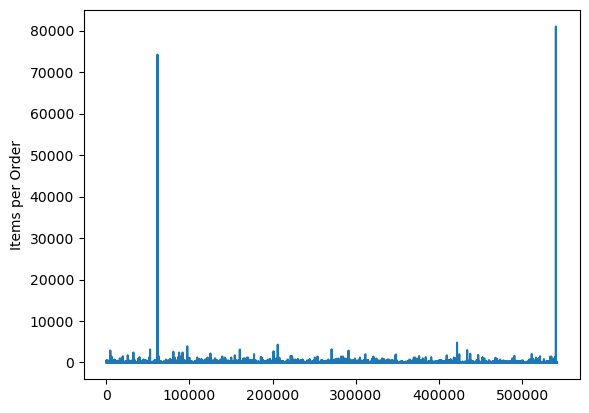

In [22]:
plt.plot(df['Quantity'])
plt.ylabel('Items per Order')

{'whiskers': [<matplotlib.lines.Line2D at 0x58d260ac90>,
 'caps': [<matplotlib.lines.Line2D at 0x58ce5f4e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x58d260af10>],
 'medians': [<matplotlib.lines.Line2D at 0x58ce5f5b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x58ce57f6d0>],
 'means': []}

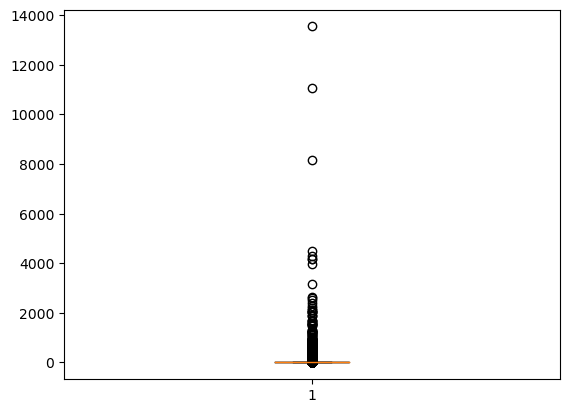

In [23]:
plt.boxplot(df['UnitPrice'])

#### 2.4 Remove Duplicates

In [24]:
dupes = df.duplicated()

In [25]:
dupes.sum()

5226

In [26]:
df.drop_duplicates(inplace = True)

In [27]:
df.duplicated().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524877 non-null  float64       
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 36.0+ MB


#### 2.5 Remove Outliers

In [29]:
df['Quantity'].quantile(.99)

100.0

In [30]:
df['Quantity'].quantile(.97)

48.0

In [31]:
df['Quantity'].quantile(.95)

30.0

In [32]:
df = df[df['Quantity'] < 100]

Text(0, 0.5, 'SKU Quant per Order')

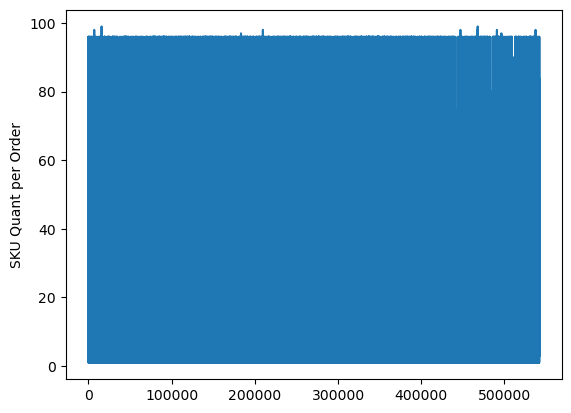

In [33]:
plt.plot(df['Quantity'])
plt.ylabel('SKU Quant per Order')

{'whiskers': [<matplotlib.lines.Line2D at 0x58d4617690>,
 'caps': [<matplotlib.lines.Line2D at 0x58d4bee510>,
 'boxes': [<matplotlib.lines.Line2D at 0x58ce602f90>],
 'medians': [<matplotlib.lines.Line2D at 0x58d4bec850>],
 'fliers': [<matplotlib.lines.Line2D at 0x58ce45cc90>],
 'means': []}

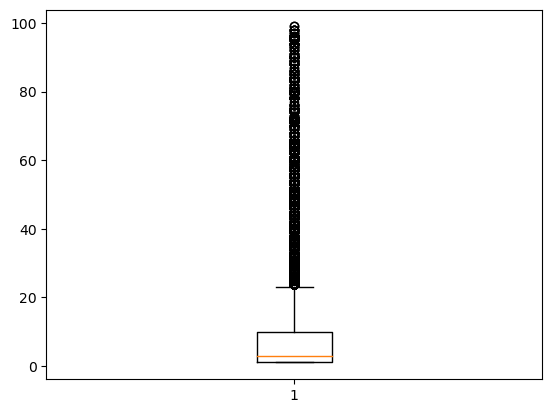

In [34]:
plt.boxplot(df['Quantity'])

In [35]:
df['UnitPrice'].quantile(.999)

167.02775000000082

In [36]:
df = df[df['UnitPrice'] < 166]

{'whiskers': [<matplotlib.lines.Line2D at 0x58d462ab10>,
 'caps': [<matplotlib.lines.Line2D at 0x58d462bdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x58d462a390>],
 'medians': [<matplotlib.lines.Line2D at 0x58d6e67610>],
 'fliers': [<matplotlib.lines.Line2D at 0x58d18e4550>],
 'means': []}

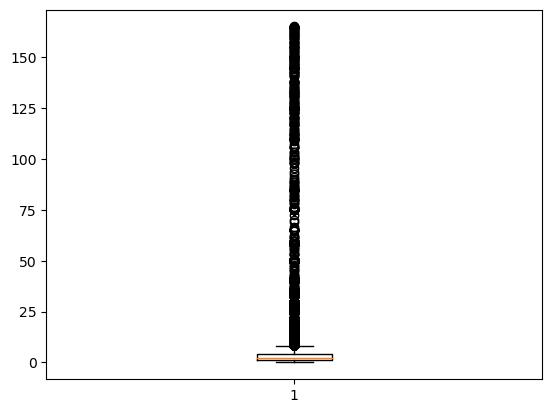

In [37]:
plt.boxplot(df['UnitPrice'])

#### 2.6 Remove Extra Spaces

In [38]:
df['Description'] = df['Description'].apply(lambda x: x.strip())

In [39]:
df['Country'] = df['Country'].apply(lambda x: x.strip())

#### 2.7 Add Geo Info for Visualization

In [40]:
country_mapping = {
    'EIRE':'Ireland',
    'Channel Islands':'Guernsey',
    'Czech Republic':'Czechia',
    'USA':'United States',
    'RSA':'South Africa'
}

In [41]:
def replace_country(country):
    return country_mapping.get(country, country)

In [42]:
df['Country'] = df['Country'].apply(replace_country)

In [43]:
countries_list = []
for item in df['Country'].unique():
    countries_list.append(item)

In [44]:
countries_df = pd.DataFrame({'Country':countries_list})

In [45]:
def get_geo(country):
    try:
        country_obj = pycountry.countries.get(name=country)
        geolocator = Nominatim(user_agent="geo-data-analysis")
        location = geolocator.geocode(country_obj.name)
        country_code = pycountry.countries.get(name=country).alpha_3
        return location.latitude, location.longitude, country_code
    except AttributeError:
        return None, None

In [46]:
countries_df[['lat', 'long', 'geocode']] = countries_df['Country'].apply(get_geo).apply(pd.Series)
countries_df

,Country,lat,long,geocode
0,United Kingdom,54.702354,-3.276575,GBR
1,France,46.603354,1.888334,FRA
2,Australia,-24.776109,134.755000,AUS
3,Netherlands,52.243498,5.634323,NLD
4,Germany,40.420348,-79.116698,DEU
5,Norway,64.573154,11.528036,NOR
6,Ireland,52.865196,-7.979460,IRL
7,Switzerland,46.798562,8.231974,CHE
8,Spain,39.326068,-4.837979,ESP
9,Poland,52.215933,19.134422,POL


#### 2.8 Merge & Save Cleaned Data

In [56]:
df = df.merge(countries_df, how='left', on='Country')

In [57]:
df.to_csv('Cleaned eCommerce Data 11302023')

## Step 3: Analyze & Visualize

In [53]:
df = pd.read_csv('Cleaned eCommerce Data 11302023')

In [86]:
df.drop(['Unnamed: 0'], axis=1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lat,long,geocode
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,54.702354,-3.276575,GBR
1,536365.0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,54.702354,-3.276575,GBR
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,54.702354,-3.276575,GBR
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,54.702354,-3.276575,GBR
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,54.702354,-3.276575,GBR
...,...,...,...,...,...,...,...,...,...,...,...
517697,581587.0,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,46.603354,1.888334,FRA
517698,581587.0,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,46.603354,1.888334,FRA
517699,581587.0,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,46.603354,1.888334,FRA
517700,581587.0,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,46.603354,1.888334,FRA


In [70]:
colors = ['#0e1bb4', '#005d10', '#bc164c', '#7f0769', '#4f10a5', '#008621']

In [76]:
sns.set()

def hex_to_rgb(hex_value):
  h = hex_value.lstrip('#')
  return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

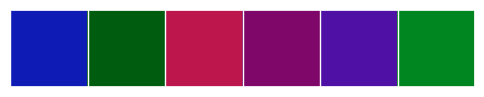

In [77]:
rgb_colors = list(map(hex_to_rgb, colors))

sns.palplot(rgb_colors)

In [89]:
df['TotalCost'] = df['Quantity']*df['UnitPrice']

In [104]:
df_by_invoice = df.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'geocode'], as_index=False).agg({'Quantity':'sum', 'TotalCost':'sum'})

In [128]:
country_freq_df = df_by_invoice['geocode'].value_counts().rename_axis('geocode').reset_index(name='Invoices')

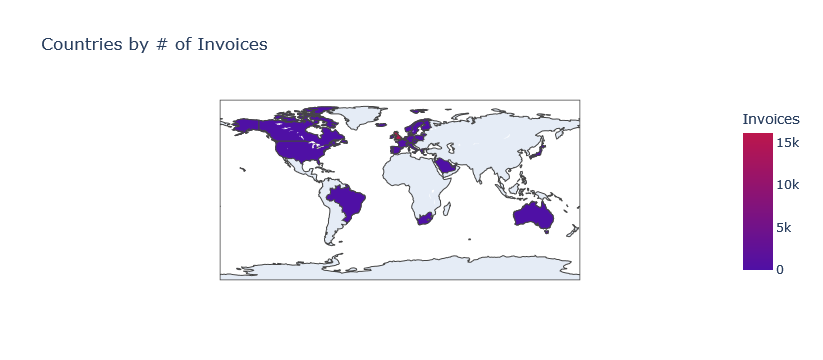

In [129]:
fig = px.choropleth(country_freq_df, locations='geocode',
                    color='Invoices',
                    color_continuous_scale=[colors[4], colors[2]],
                   title="Countries by # of Invoices")
fig.show()

In [119]:
country_rev_df = df_by_invoice.groupby('geocode', as_index=False).agg({'TotalCost':'sum'})

In [124]:
country_rev_df.rename(columns={'TotalCost': 'Revenue'}, inplace=True)

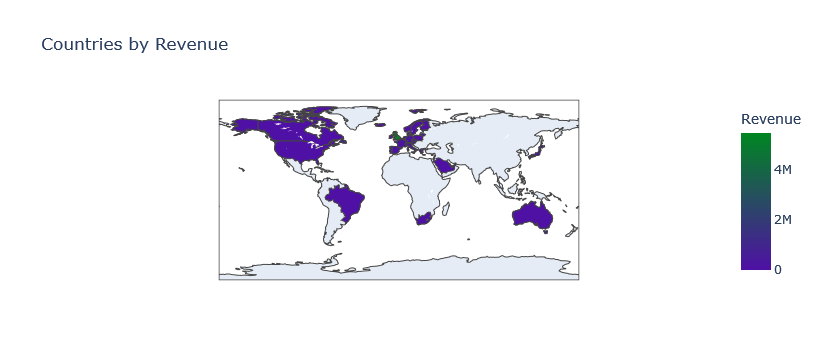

In [127]:
fig = px.choropleth(country_rev_df, locations='geocode',
                    color='Revenue',
                    color_continuous_scale=[colors[4],colors[5]],
                   title="Countries by Revenue")
fig.show()